In [ ]:
from google.colab import files


uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/water_potability.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import scipy
from keras.models import Sequential
from keras.layers import Dense, Activation
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/water_potability.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#There are a lot of NaN in 'ph', 'Sulfate' and 'Trihalomethanes'. So at first, we filled NaN by IterativeImputer.

In [ ]:
x = df.drop(["Potability"],axis=1)
y = df["Potability"]
# print(x)

x = x.values

In [ ]:
x

array([[           nan, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(x,y)
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001,
                 verbose=0)

IterativeImputer(max_value=None, min_value=None, random_state=0)

In [ ]:
x=imp.transform(x)

In [ ]:
x

array([[7.19086276e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [ ]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)
df=pd.concat([x, y],axis=1)
df=df.rename({0:'ph',1:'Hardness',2:'Solids', 3:'Chloramines', 4:'Sulfate', 5:'Conductivity',
       6:'Organic_carbon', 7:'Trihalomethanes', 8:'Turbidity'}, axis='columns')

In [ ]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.190863  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  344.836463   
2     8.099124  224.236259  19909.541732     9.275884  331.981769   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  338.612062   
3273  9.419510  175.762646  33155.578218     7.350233  326.848982   
3274  5.126763  230.603758  11983.869376     6.303357  336.993878   
3275  7.874671  195.102299  17404.177061     7.509306  338.025733   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.474992   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
 # Data Visualization¶
#1) Histplot of features by "Potability"

In [ ]:
num=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

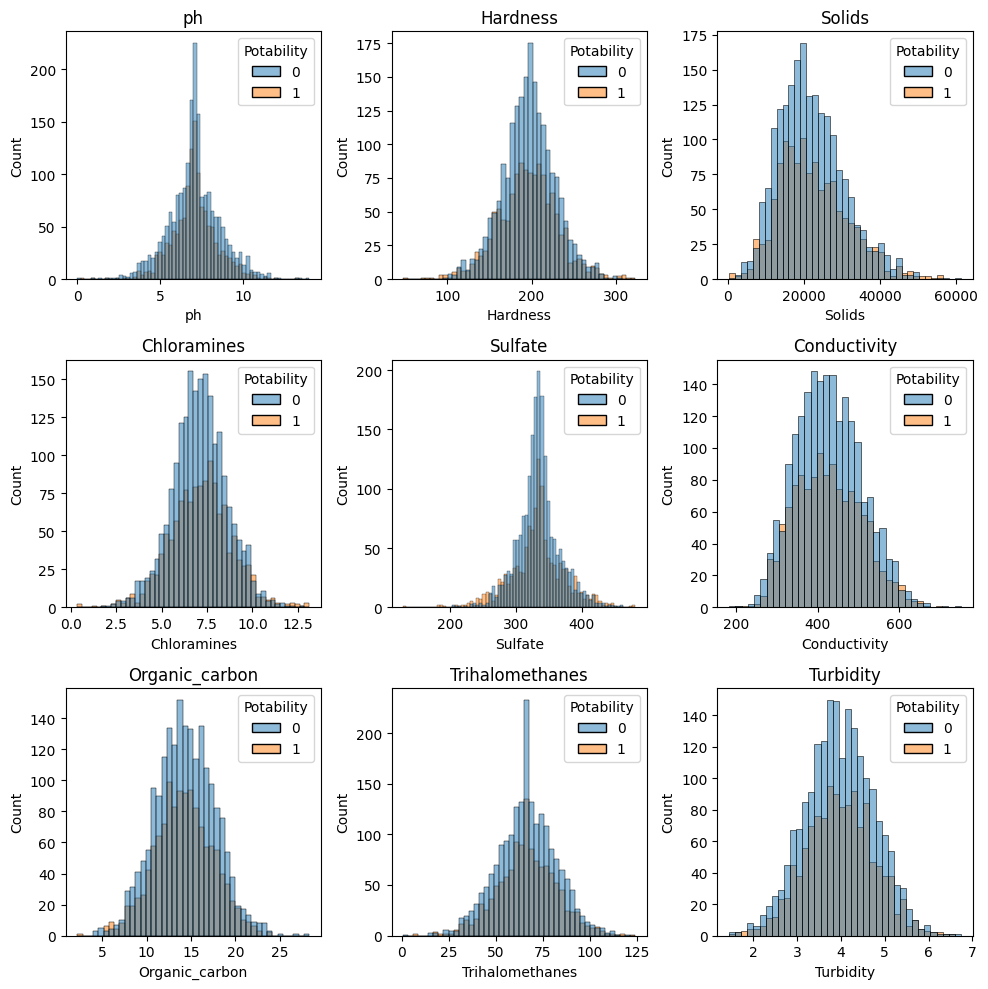

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num)):
    plt.subplot(3,3,i+1)
    plt.title(num[i])
    sns.histplot(data=df,x=df[num[i]],hue='Potability')
plt.tight_layout()
plt.show()



#HISTPLOT OF FEATURES OF WATER BY POTABILITY

In [ ]:
# Both "Portability=0" and "Portability=1" are normal distributions in all the features.

In [ ]:
# 2) The means of each features by "Portability=0" and "Portability=1"

In [ ]:
df.groupby('Potability').mean().T

Potability                  0             1
ph                   7.085197      7.072237
Hardness           196.733292    195.800744
Solids           21777.490788  22383.991018
Chloramines          7.092175      7.169338
Sulfate            334.380671    332.853768
Conductivity       426.730454    425.383800
Organic_carbon      14.364335     14.160893
Trihalomethanes     66.308013     66.532042
Turbidity            3.965800      3.968328

In [ ]:
# There are no significant difference of means between "Portability=0" and "Portability=1".

In [ ]:
fmt="1.1f"

In [ ]:
# 3) Correlation heatmap

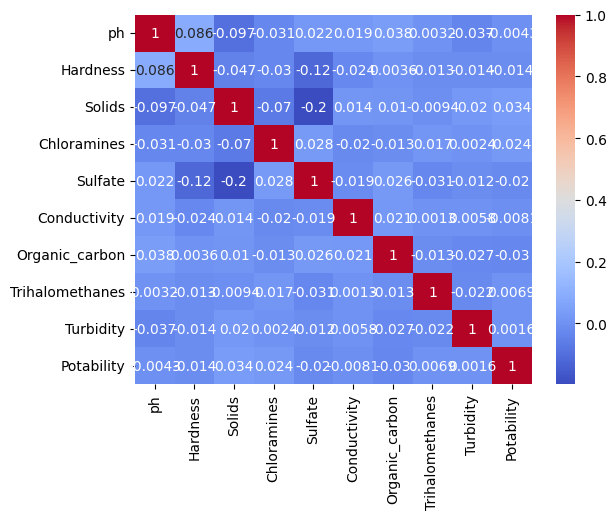

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm');

In [ ]:
# There are no strong correlation among features.

In [ ]:
# 4) Pairplot by "Portability=0" and "Portability=1".

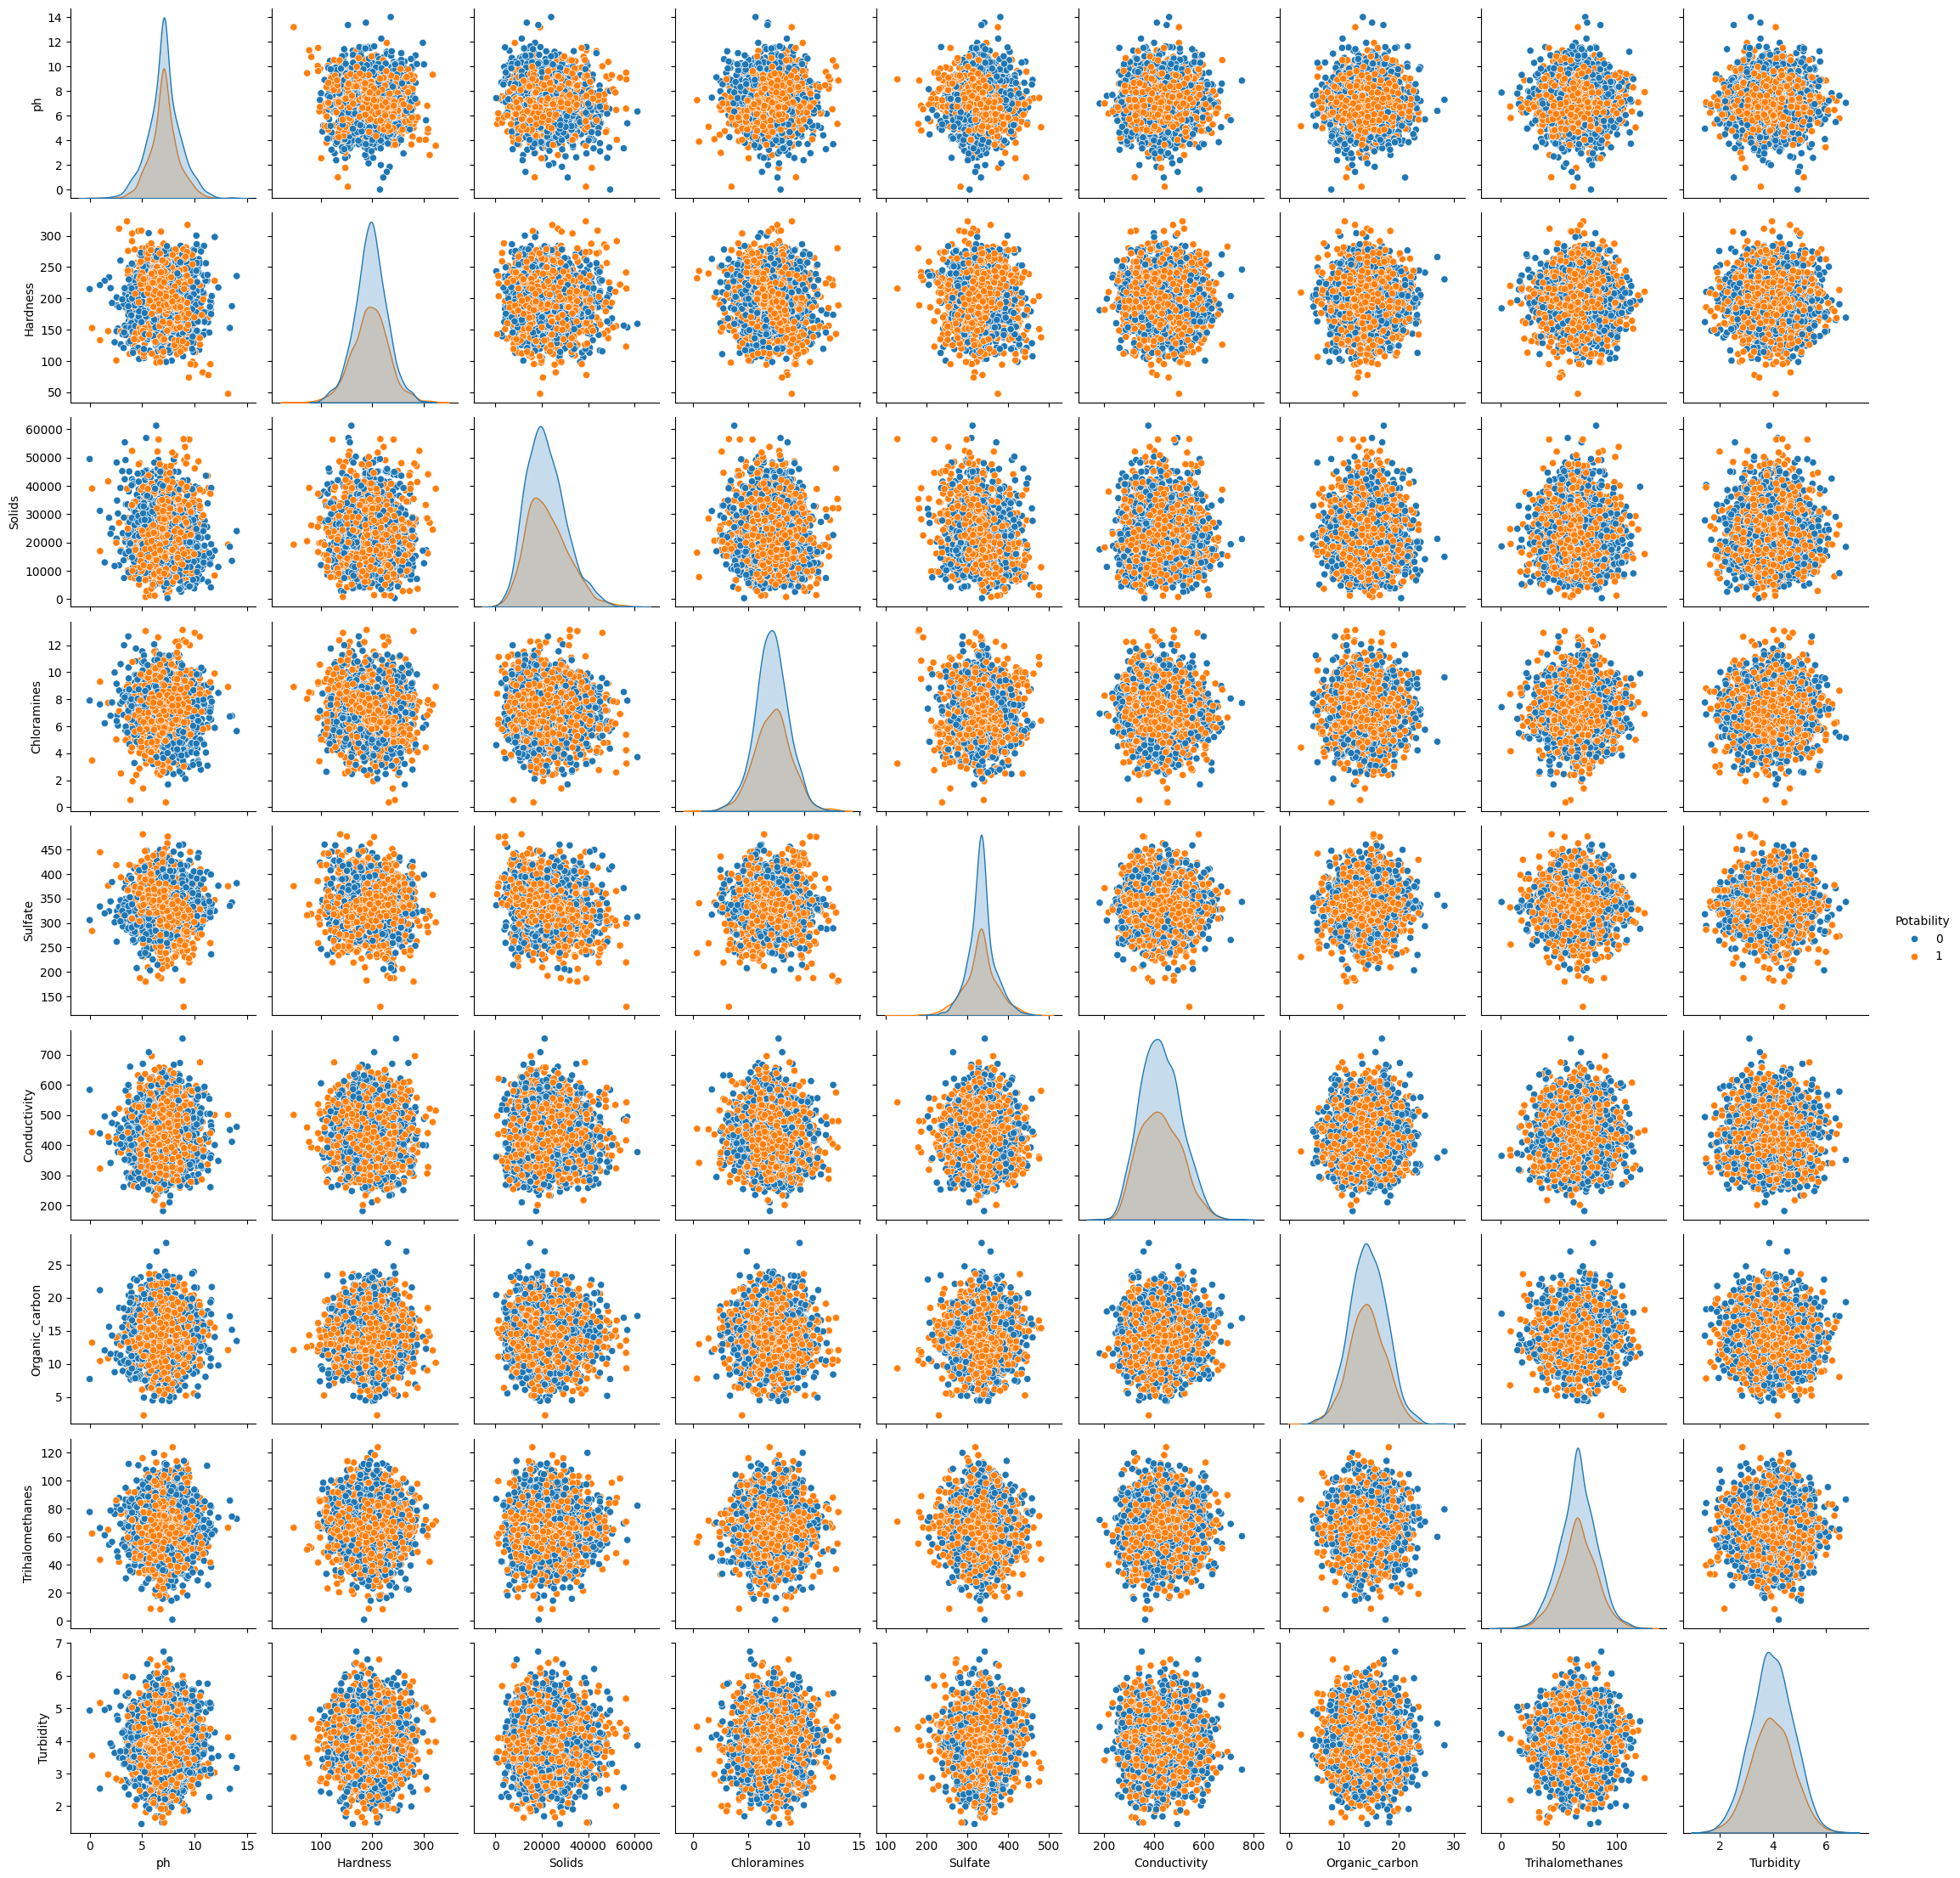

In [ ]:
sns.pairplot(df,hue='Potability');

In [ ]:
# There seem to be similar distributions between "Portability=0" and "Portability=1". So it may be very difficult to build high acurate model to classify.

#As next step, we tried to bin each features to three.

In [ ]:
# Binning

In [ ]:
X = df.drop(["Potability"],axis=1)
y = df["Potability"]

In [ ]:
X

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.190863  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  344.836463   
2     8.099124  224.236259  19909.541732     9.275884  331.981769   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  338.612062   
3273  9.419510  175.762646  33155.578218     7.350233  326.848982   
3274  5.126763  230.603758  11983.869376     6.303357  336.993878   
3275  7.874671  195.102299  17404.177061     7.509306  338.025733   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.474992   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [ ]:
X['ph']=pd.cut(X['ph'],3,labels=False)
X['Hardness']=pd.cut(X['Hardness'],3,labels=False)
X['Solids']=pd.cut(X['Solids'],3,labels=False)
X['Chloramines']=pd.cut(X['Chloramines'],3,labels=False)
X['Sulfate']=pd.cut(X['Sulfate'],3,labels=False)
X['Conductivity']=pd.cut(X['Conductivity'],3,labels=False)
X['Organic_carbon']=pd.cut(X['Organic_carbon'],3,labels=False)
X['Trihalomethanes']=pd.cut(X['Trihalomethanes'],3,labels=False)
X['Turbidity']=pd.cut(X['Turbidity'],3,labels=False)

In [ ]:
X

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      1         1       1            1        2             2   
1      0         0       0            1        1             2   
2      1         1       0            2        1             1   
3      1         1       1            1        1             0   
4      1         1       0            1        1             1   
...   ..       ...     ...          ...      ...           ...   
3271   1         1       2            1        1             1   
3272   1         1       0            1        1             1   
3273   2         1       1            1        1             1   
3274   1         1       0            1        1             1   
3275   1         1       0            1        1             0   

      Organic_carbon  Trihalomethanes  Turbidity  
0                  0                2          0  
1                  1                1          1  
2                  1                1          0  
3                  1                2          1  
4                  1                0          1  
...              ...              ...        ...  
3271               1                1          1  
3272               2                1          0  
3273               1                1          1  
3274               1                1          1  
3275               1                1          0  

[3276 rows x 9 columns]

In [ ]:
# As third step, I also tried to add clustering as another feature.

#Clustering

In [ ]:
from sklearn.cluster import KMeans

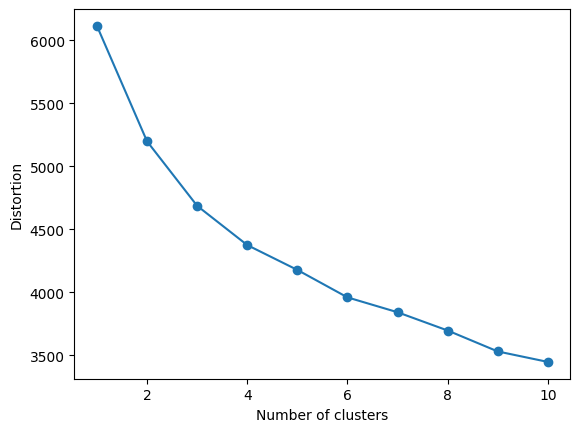

In [ ]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(X)

KMeans(n_clusters=3, random_state=1)

In [ ]:
cluster = model.labels_

In [ ]:
X['Cluster']=cluster

In [ ]:
X

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      1         1       1            1        2             2   
1      0         0       0            1        1             2   
2      1         1       0            2        1             1   
3      1         1       1            1        1             0   
4      1         1       0            1        1             1   
...   ..       ...     ...          ...      ...           ...   
3271   1         1       2            1        1             1   
3272   1         1       0            1        1             1   
3273   2         1       1            1        1             1   
3274   1         1       0            1        1             1   
3275   1         1       0            1        1             0   

      Organic_carbon  Trihalomethanes  Turbidity  Cluster  
0                  0                2          0        0  
1                  1                1          1        0  
2                  1                1          0        0  
3                  1                2          1        1  
4                  1                0          1        0  
...              ...              ...        ...      ...  
3271               1                1          1        2  
3272               2                1          0        0  
3273               1                1          1        2  
3274               1                1          1        0  
3275               1                1          0        1  

[3276 rows x 10 columns]

In [ ]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Cluster'],
      dtype='object')

In [ ]:
categorical_features_indices = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df.groupby('Potability').count()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
Potability                                                               
0           1998      1998    1998         1998     1998          1998   
1           1278      1278    1278         1278     1278          1278   

            Organic_carbon  Trihalomethanes  Turbidity  
Potability                                              
0                     1998             1998       1998  
1                     1278             1278       1278

In [ ]:
#There are some imbalrance between "Portability=0" and "Portability=1". So I tried to balancee by smote.

#SMOTE

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
oversample = SMOTE()
X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_train)

In [ ]:
Counter(y_train_s)

Counter({0: 1381, 1: 1381})

In [ ]:
#Modeling by catboost

In [ ]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:

    !pip install catboost
    !pip install ipywidgets
    !jupyter nbextension enable --py widgetsnbextension

    print('Environment: Google Colab')

from catboost import CatBoostClassifier, Pool

In [ ]:
train_pool = Pool(X_train_s, y_train_s, cat_features=categorical_features_indices)
validate_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
params = {
    'depth' : 6,
    'learning_rate' : 0.16,
    'early_stopping_rounds' : 10,
    'iterations' : 200,
    'custom_loss' :['Accuracy'],
    'random_seed' :42
}
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

0:	learn: 0.6865800	test: 0.6898350	best: 0.6898350 (0)	total: 77.2ms	remaining: 15.4s
1:	learn: 0.6838662	test: 0.6892981	best: 0.6892981 (1)	total: 108ms	remaining: 10.7s
2:	learn: 0.6808065	test: 0.6881652	best: 0.6881652 (2)	total: 127ms	remaining: 8.37s
3:	learn: 0.6793909	test: 0.6867427	best: 0.6867427 (3)	total: 151ms	remaining: 7.38s
4:	learn: 0.6788752	test: 0.6863003	best: 0.6863003 (4)	total: 172ms	remaining: 6.69s
5:	learn: 0.6756110	test: 0.6857261	best: 0.6857261 (5)	total: 197ms	remaining: 6.37s
6:	learn: 0.6748672	test: 0.6850865	best: 0.6850865 (6)	total: 209ms	remaining: 5.77s
7:	learn: 0.6724626	test: 0.6842793	best: 0.6842793 (7)	total: 231ms	remaining: 5.55s
8:	learn: 0.6723654	test: 0.6840477	best: 0.6840477 (8)	total: 243ms	remaining: 5.15s
9:	learn: 0.6709873	test: 0.6837585	best: 0.6837585 (9)	total: 268ms	remaining: 5.09s
10:	learn: 0.6706795	test: 0.6832457	best: 0.6832457 (10)	total: 296ms	remaining: 5.09s
11:	learn: 0.6705270	test: 0.6833441	best: 0.683245

In [ ]:
y_pred=model.predict(X_test)

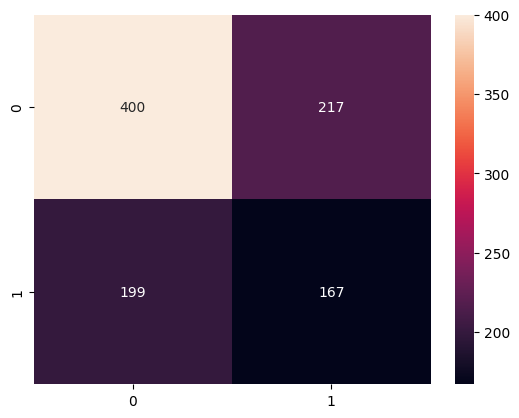

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt="d");